<a href="https://colab.research.google.com/github/rahul70245/Market-Segmentation/blob/main/MARKET_SEGMENTATION_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
# calling all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

In [324]:
# reading the data

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


**DATA** **EXPLORING**

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [326]:
# stats

df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [327]:
# checking null entries

df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [328]:
# checking duplicacy

df.duplicated().sum()

22

In [329]:
df[df.duplicated()]

# no duplicacy in the data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,I love it!+5,50,Once a week,Female
421,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,3,25,Once a month,Male
441,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,2,62,Every three months,Female
453,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,2,43,Every three months,Female
598,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,59,Never,Female
674,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,26,More than once a week,Female
710,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,4,49,Once a week,Female
725,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,0,42,Once a month,Female
741,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,2,21,Every three months,Female
744,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,18,Once a week,Female


**EXPLORATORY DATA ANALYSIS**

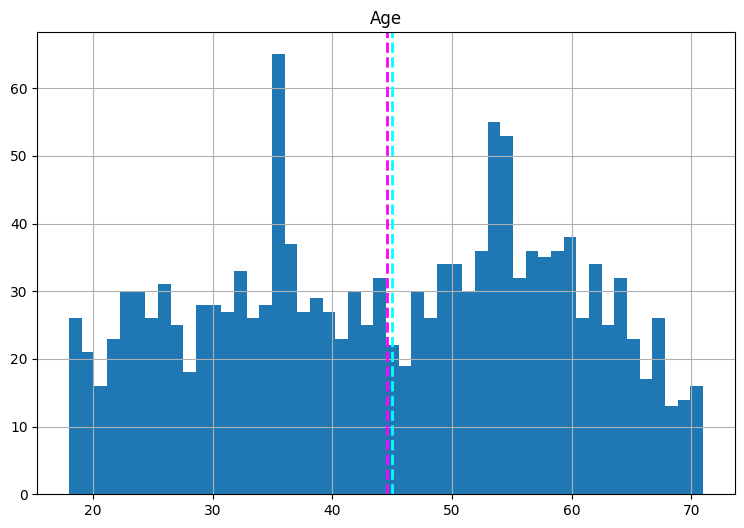

In [330]:
# distribution, skewness, mean, median of numerical features

n=['Age']

for col in n:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

<ipython-input-331-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

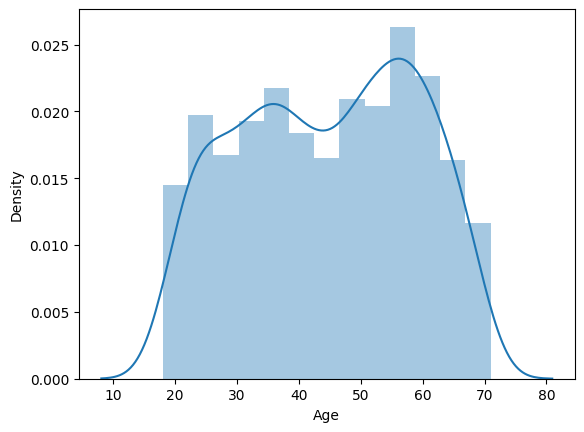

In [331]:
sns.distplot(df['Age'])

Age is in normal distribution also does not contain any null value

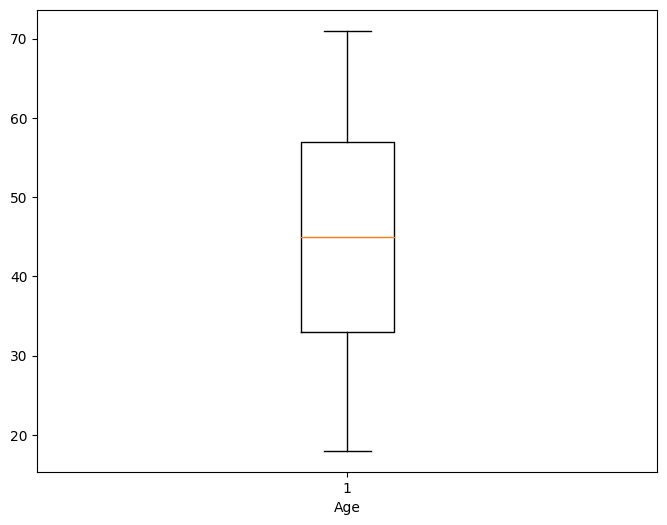

In [332]:
# checking outlier in age

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

In [333]:
# checking unique values for categorical columns


In [334]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

<Axes: ylabel='count'>

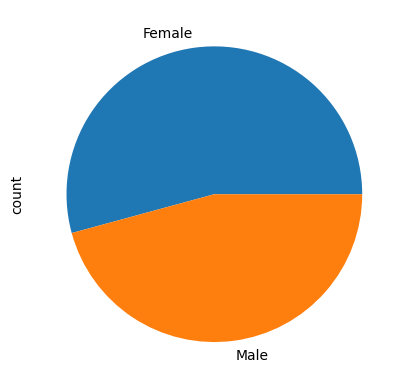

In [335]:
df['Gender'].value_counts().plot(kind='pie')

# we can say that it is a balanced data

In [336]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

<Axes: xlabel='VisitFrequency'>

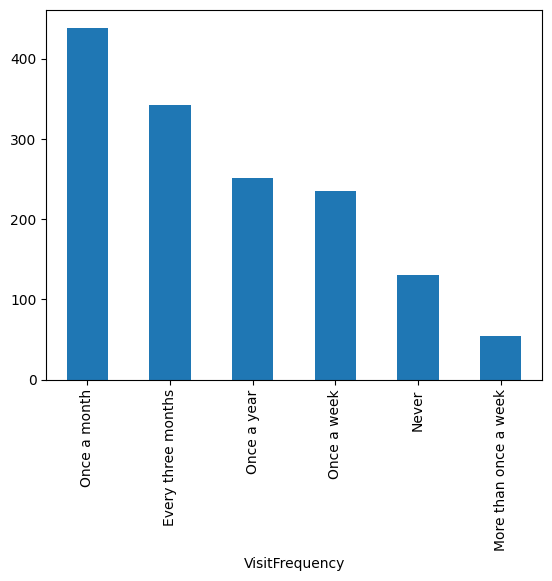

In [337]:
df['VisitFrequency'].value_counts().plot(kind='bar')

In [338]:
df['Like'].value_counts()

Like
3               229
2               187
0               169
4               160
1               152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

**PRE-PROCESSING**

In [339]:
# encoding the categorical columns one by one

In [340]:
# dealing with like field

def categorizing(s):
  if s in 'I hate it!-5 ':
    return '-5'
  elif s =='I love it!+5':
    return '5'
  else:
    return s


In [341]:
df['Like']=df['Like'].apply(categorizing)

In [342]:
df['Like']=pd.to_numeric(df['Like'])
df['Like'].value_counts()

Like
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [343]:
# dealing with gender field

df['Gender'] = df['Gender'].replace({'Female':'0','Male':'1'})

In [344]:
df['Gender']=pd.to_numeric(df['Gender'])
df['Gender'].value_counts()

Gender
0    788
1    665
Name: count, dtype: int64

In [345]:
# dealing with visitfrequency field

values_to_change = {'Every three months': 1, 'Once a week': 4, 'Once a month': 3, 'Once a year': 0.5, 'More than once a week': 5, 'Never': 0}

df['VisitFrequency'] = df['VisitFrequency'].replace(values_to_change)

In [346]:
df['VisitFrequency']=pd.to_numeric(df['VisitFrequency'])

In [347]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,1.0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,1.0,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,1.0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,4.0,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,3.0,1


In [348]:
# dealing with yes and no values in fields


value_to_change = {'Yes': 1, 'No': 0}

columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[columns] = df[columns].replace(value_to_change)


In [349]:
# or we can do it this way also and with for loop the same thing

# creating a function to change yes to 1 and no to 0

# def c(s):
#   if s in 'Yes':
#     return '1'
#   elif s =='No':
#     return '0'


# df['yummy']= pd.to_numeric(df['yummy'].apply(c))
# df['convenient']= pd.to_numeric(df['convenient'].apply(c))
# df['spicy']= pd.to_numeric(df['spicy'].apply(c))
# df['fattening']= pd.to_numeric(df['fattening'].apply(c))
# df['greasy']= pd.to_numeric(df['greasy'].apply(c))
# df['fast']= pd.to_numeric(df['fast'].apply(c))
# df['cheap']= pd.to_numeric(df['cheap'].apply(c))
# df['tasty']= pd.to_numeric(df['tasty'].apply(c))
# df['expensive']= pd.to_numeric(df['expensive'].apply(c))
# df['healthy']= pd.to_numeric(df['healthy'].apply(c))
# df['disgusting']= pd.to_numeric(df['disgusting'].apply(c))

In [350]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1.0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1.0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1.0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4.0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3.0,1


<Axes: >

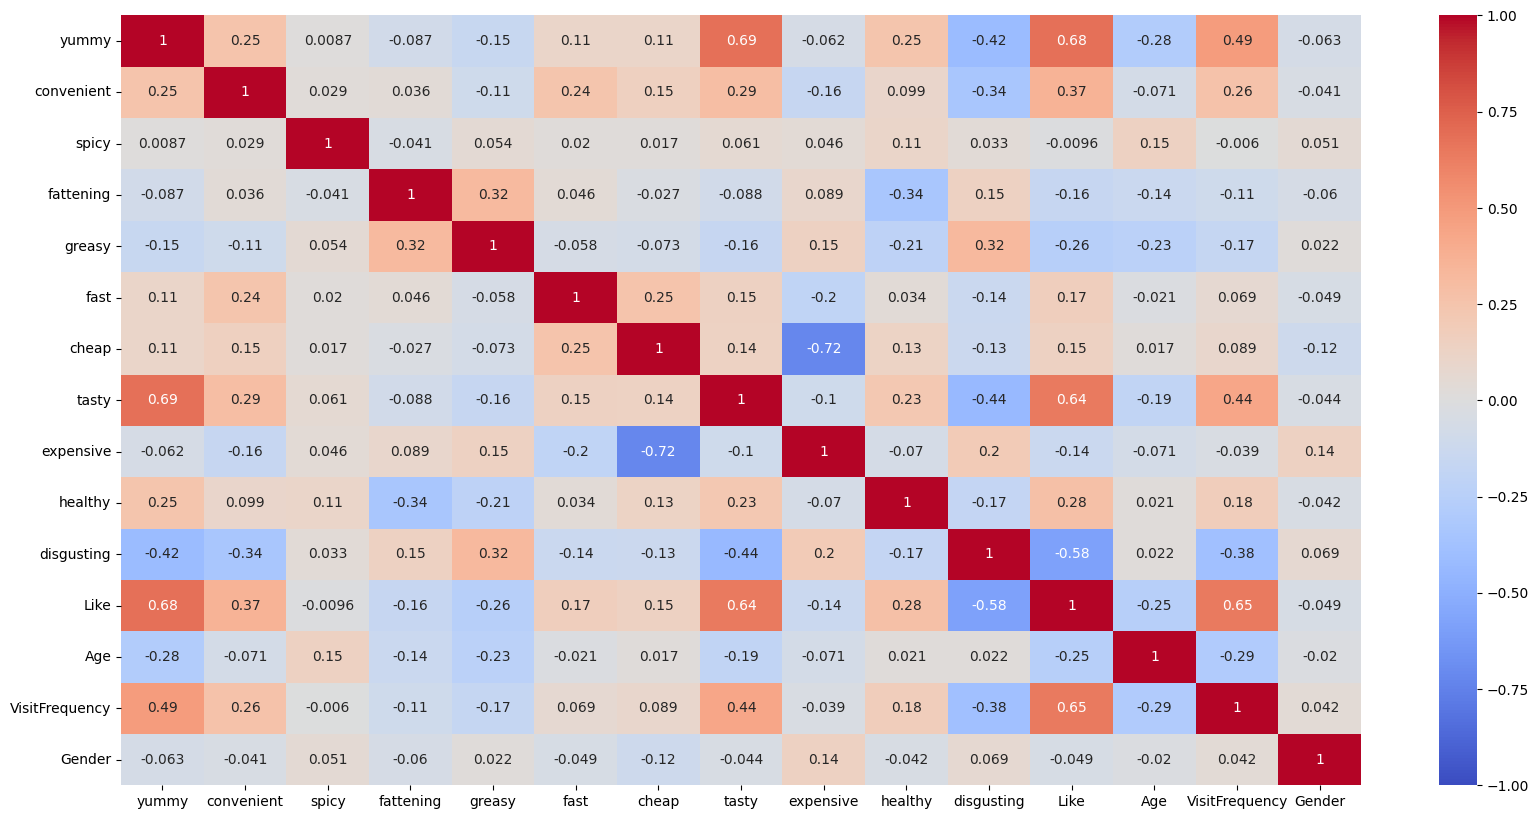

In [351]:
#  correlation plot


plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')

**FEATURE SCALING**

In [352]:
# defining columns to scale as other columns are already between 0 to 1

columns_to_scale=['Like','Age', 'VisitFrequency' ]

In [353]:
scaler=MinMaxScaler()
df[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])

In [354]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0.2,0.811321,0.2,0
1,1,1,0,1,1,1,1,1,1,0,0,0.7,0.622642,0.2,0
2,0,1,1,1,1,1,0,1,1,1,0,0.6,0.830189,0.2,0
3,1,1,0,1,1,1,1,1,0,0,1,0.9,0.962264,0.8,0
4,0,1,0,1,1,1,1,0,0,1,0,0.7,0.584906,0.6,1


<Axes: >

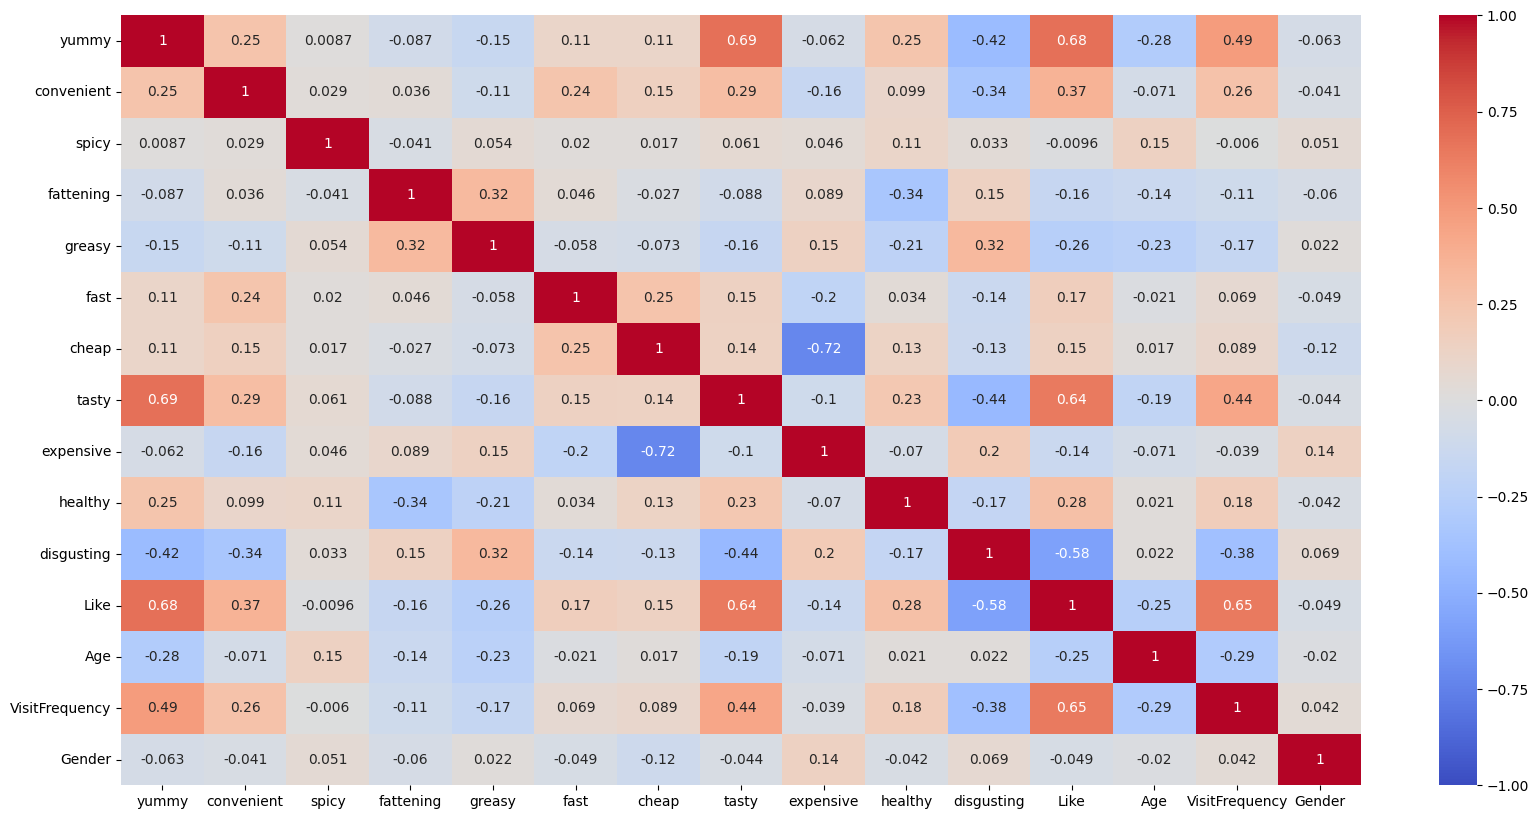

In [355]:
# again correlation plot

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')

ELBOW METHOD FOR DECIDING NUMBER OF CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

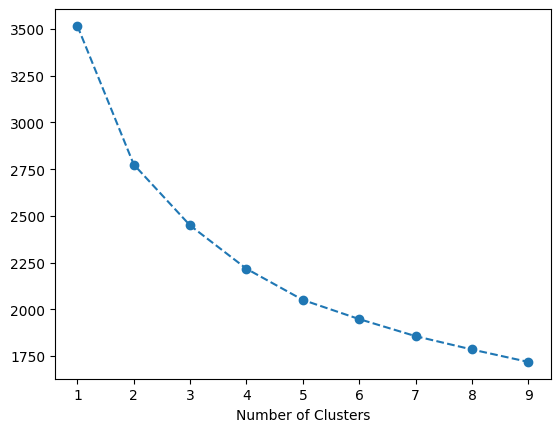

In [356]:

clustering_score = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df)
    clustering_score.append(kmeans.inertia_)

plt.plot(range(1,10), clustering_score, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.show()

number of clusters will be 5 as the fall is very low after that

TRAINING THE MODEL WITH NUMBER OF CLUSTER DEFINED

In [357]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [358]:
data_predict=kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [360]:
print(data_predict)

[2 1 4 ... 4 0 3]


Now the model is ready and we can predict that any new customer will be in which cluster or segment and we can decide for the organization which segment to target